<a href="https://colab.research.google.com/github/KShikha19/eda_proj/blob/main/Netflix_Biz_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**

Analyze the netflix dataset to understand which content type or genre is popular amount countries, top rating content, which is the most popular director/ actor in netflix over the time that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix = pd.read_csv('netflix_1.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<font color='purple'>Exploration of dataset </font>


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 8807 rows, 12 cols, some of the cols like director, cast, date_added have null values which need to be deal during data cleaning. Datatype of all cols is object while release_year is of interger type which need to be change to datetime along with this i have to change datatype of date_added. It will help in analysis time based analysis.

In [5]:
netflix.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


There are 2634 null values in director column, 825 null values in cast, 831 values in country

In [6]:
netflix.shape

(8807, 12)

It shows that there are 8807 rows and 12 cols in dataset.

In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Name of all the columns in dataset.

In [8]:
netflix.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


The type column has 2 unique values.

Rajiv Chilaka is the director with the highest number of titles in the dataset (19 titles).

I need to perform further analysis to determine which content type he directed the most.

The United States has produced the highest number of titles (2,818 entries).

The release year ranges from 1925 to 2021.

In [9]:
#Dealing with nan values in cast col by filling with 'Unknown Actor'
netflix['cast'] = netflix['cast'].fillna('Unknown Actor')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown Actor,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
#individual cast name in seprate columns
cast = netflix['cast'].apply(lambda x: x.split(', ')).to_list()
cast[:5]

[['Unknown Actor'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['Unknown Actor'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar']]

In [11]:
a = pd.DataFrame(cast, index = netflix['title']).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'cast'})
a[:5]

,title,cast
0,Dick Johnson Is Dead,Unknown Actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [12]:
# data with seperate cast col
data_cast_cols = netflix.merge(a,  how='inner', on='title')
data_cast_cols.drop('cast_x', axis=1, inplace=True)
data_cast_cols.rename(columns={'cast_y':'cast'})
data_cast_cols.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Actor
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [13]:
# dealing with nan values in director col by filling with 'Unknown Director'
data_cast_cols['director'] = data_cast_cols['director'].fillna('Unknown Director')
data_cast_cols.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Actor
1,s2,TV Show,Blood & Water,Unknown Director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Unknown Director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,Unknown Director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,Unknown Director,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [14]:
dir_name = data_cast_cols['director'].apply(lambda x: x.split(', ')).to_list()
dir = pd.DataFrame( dir_name, index=data_cast_cols['title'])
dir = dir.stack().reset_index().drop('level_1' , axis=1).rename(columns = {0:'director_name'})
dir[:5]

,title,director_name
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown Director
2,Blood & Water,Unknown Director
3,Blood & Water,Unknown Director
4,Blood & Water,Unknown Director


In [15]:
data = data_cast_cols.merge(dir, how='inner', on='title').drop('director', axis=1).rename(columns= {'cast_y':'cast', 'director_name':'director'} )
data = data[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [16]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,53453
date_added,693
release_year,0
rating,586
duration,3


Director and cast columns have zero null values now

In [17]:
#null values in duration column
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
469702,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
489276,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
489882,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [18]:
#rate of nan values in director col
len(data.loc[data['director'] == 'Louis C.K.'])/len(data)

3.9932700089449245e-06

In [19]:
data.dropna(subset=['duration'],inplace=True)

As Louis C.K.director with nan values info in duration has less than 5% of entire data(70k + rows), simply dropping off doesnt impact analysis

In [20]:
data['movie_mints']= data[data['type']=='Movie']['duration'].apply(lambda x: int(x.split(' ')[0]))
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN


In [21]:
data['TV_Show_mints']= data[data['type']=='TV Show']['duration'].apply(lambda x: int(x.split(' ')[0]))
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_mints,TV_Show_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0


In [22]:
data.drop(columns = 'duration', axis=1, inplace=True)

In [23]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0


In [24]:
#some of the contries in countries columns contain multiple countries as comma sepreated values. We have to deal with it
data['country'].isna().sum()

np.int64(53453)

In [25]:
#filling null values in country columns with not available
data['country']=data['country'].fillna('Not Available')

In [26]:
data['country'].isna().sum()

np.int64(0)

In [27]:
#Converting type of categorical column to category type
categorical_cols = ['rating', 'type','rating', 'listed_in']
for col in categorical_cols:
  data[col]=data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751261 entries, 0 to 751263
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   show_id        751261 non-null  object  
 1   type           751261 non-null  category
 2   title          751261 non-null  object  
 3   director       751261 non-null  object  
 4   cast           751261 non-null  object  
 5   country        751261 non-null  object  
 6   date_added     750568 non-null  object  
 7   release_year   751261 non-null  int64   
 8   rating         750675 non-null  category
 9   listed_in      751261 non-null  category
 10  description    751261 non-null  object  
 11  movie_mints    501215 non-null  float64 
 12  TV_Show_mints  250046 non-null  float64 
dtypes: category(3), float64(2), int64(1), object(7)
memory usage: 65.9+ MB


<font color='purple'>1. How has the **number of movies** released per year changed over the last 20-30 years?</font.

In [28]:
movies  = data.loc[data['type']=='Movie'].reset_index(drop=True)
movies[:5]

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
2,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
4,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN


In [29]:
movies['release_year'].min()

1942

In [30]:
movies['release_year'].max()

2021

In [31]:
movies['release_year'].value_counts()

,count
release_year,
2018,53270
2017,50131
2016,41683
2020,39860
2019,39637
...,...
1947,8
1944,7
1942,5


[ ]
There are 50K+ movies added in netflix in year 2018

In [32]:
df = movies.loc[(movies['release_year'] >= 2000) & ( movies['release_year'] <= 2021)]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
2,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
4,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN


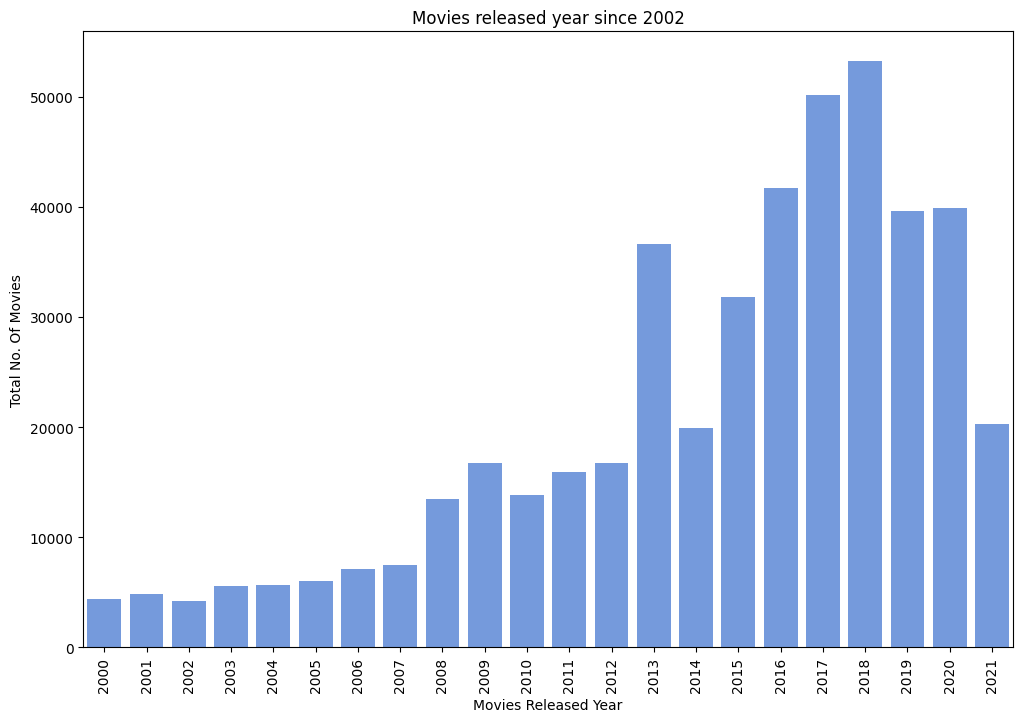

In [33]:
plt.figure(figsize=(12,8))
plt.title('Movies released year since 2002')
sns.countplot(data= df, x='release_year' , color= 'cornflowerblue')
plt.xlabel('Movies Released Year')
plt.ylabel('Total No. Of Movies')
plt.xticks(rotation=90)
plt.show()

Netflix content predominantly comes from recent years (2015-2021), with 2018 having the highest movie count at 50K+

<font color='purple'>2. How has the number of TV Show released per year changed over the last 20-30 years?</font>

In [34]:
tv_show  = data.loc[data['type']=='TV Show'].reset_index(drop=True)
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
0,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0


In [35]:
tv_show.shape

(250046, 13)

**25K+ Tv Show** released movies over the year which is **half of the number of movies** released over the same time period

In [36]:
df_tv = tv_show.loc[(tv_show['release_year'] >= 2000) & ( tv_show['release_year'] <= 2021)]
df_tv['release_year'].value_counts()

,count
release_year,
2019,48783
2020,43958
2021,34850
2018,27848
2017,23306
2016,16467
2015,14521
2014,5707
2013,5511


max number of tv shows were releases in year 2019

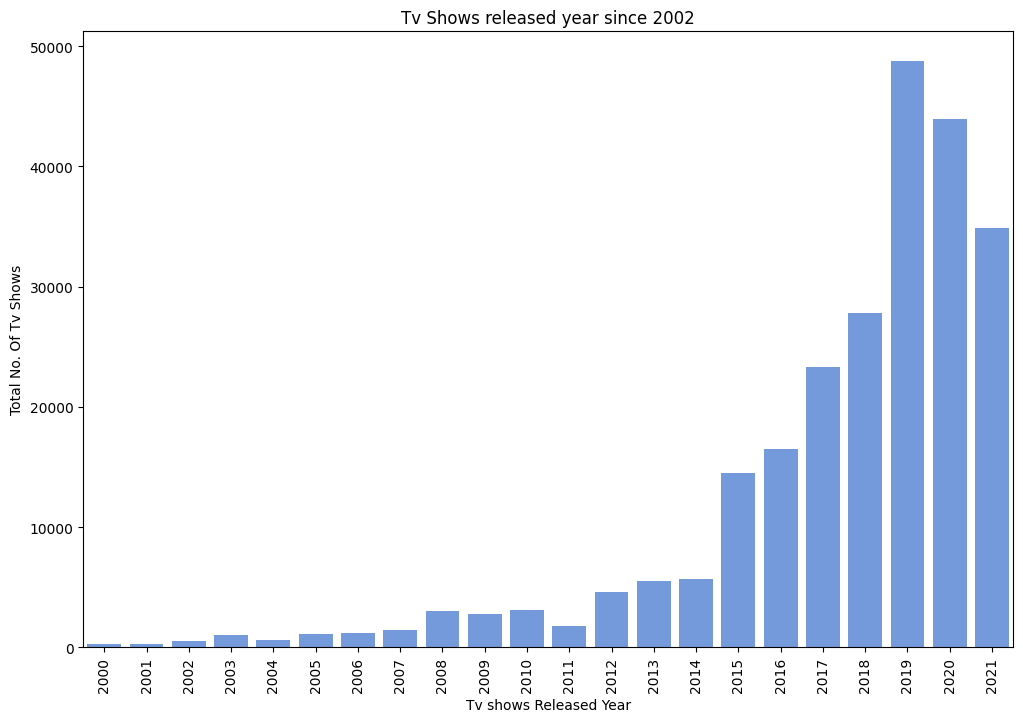

In [37]:
plt.figure(figsize=(12,8))
plt.title('Tv Shows released year since 2002')
sns.countplot(data= df_tv, x='release_year',color= 'cornflowerblue')
plt.xlabel('Tv shows Released Year')
plt.ylabel('Total No. Of Tv Shows')
plt.xticks(rotation=90)
plt.show()

Infrences: max number of tv shows were releases in year 2019

<font color='purple'>3. Comparison of Tv shows and movies released over last 20-30 years</font>


In [38]:
recent_data = data.loc[(data['release_year']>=2001) & (data['release_year']<=2021)]

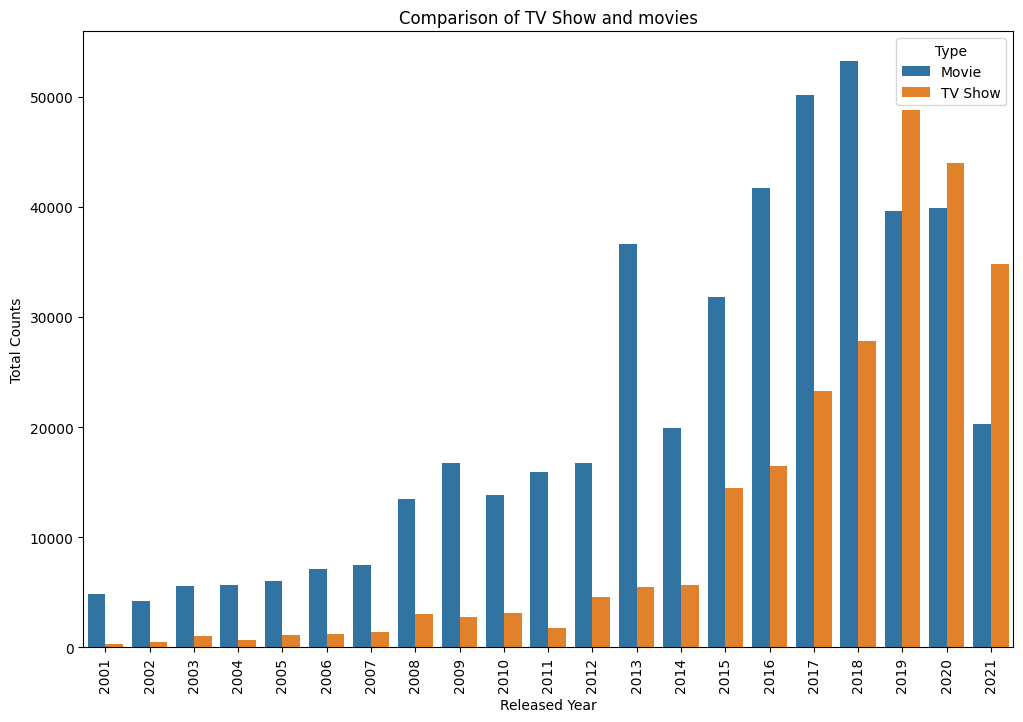

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(data= recent_data, x='release_year',hue='type' )
plt.xticks(rotation=90)
plt.legend(title = 'Type')
plt.title('Comparison of TV Show and movies')
plt.xlabel('Released Year')
plt.ylabel('Total Counts')
plt.show()

**Infrences**: From 2015 to 2020, both TV shows and movies were released in higher numbers compared to earlier years.

contribution of tv show and movies content in netflix

In [40]:
type = data['type'].value_counts()
type

,count
type,
Movie,501215
TV Show,250046


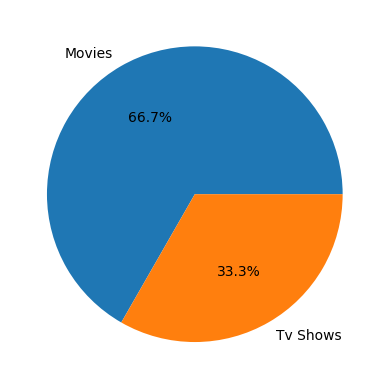

In [41]:
plt.pie(data['type'].value_counts(), labels= ['Movies', 'Tv Shows',], autopct='%1.1f%%')
plt.show()

Inferences:
66.7% of the content on Netflix is Movies, while 33.3% is TV Shows.

In [42]:
top10_Show=tv_show['country'].value_counts()[:11]
top10_Show.drop('Not Available', inplace=True)


In [43]:
top10_Show = top10_Show.reset_index()


In [44]:
top10_Show

,country,count
0,United States,62987
1,Japan,29012
2,United Kingdom,13583
3,South Korea,10580
4,India,8563
5,Spain,8208
6,Mexico,7447
7,Canada,5514
8,Australia,4880
9,Taiwan,4602


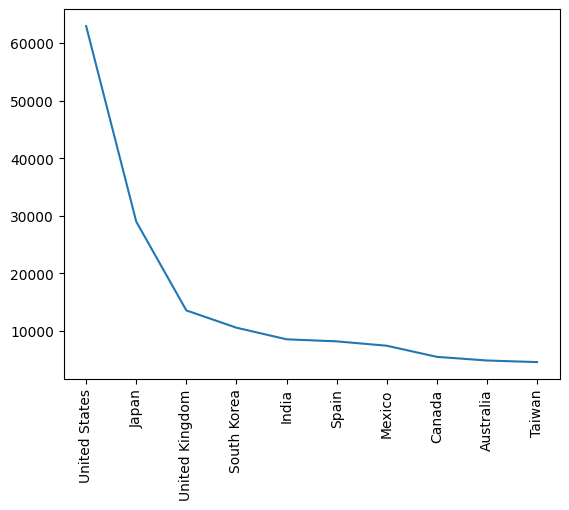

In [45]:
# sns.countplot(data= top10_show, x='country',color= 'cornflowerblue')
plt.plot(top10_Show['country'], top10_Show['count'])
plt.xticks(rotation=90)
plt.show()


Infrences: US is at, followed by Japan, India comes ar 5th position

In [46]:
data['type'].unique()

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']

Inferences: There are only two types of content available in Netflix i.e Tv Show and Movies

In [47]:
tv_show = data[data['type']=='TV Show']
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
5,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0


<font color='purple'>4. Find the number of movies produced in each country and pick the top 10 countries. </font>




In [48]:
top10_movies = movies.groupby('country')['title'].nunique().reset_index().sort_values(by='title', ascending=False)[:11]
top10_movies



,country,title
526,United States,2055
218,India,893
327,Not Available,440
441,United Kingdom,206
50,Canada,122
385,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
429,Turkey,76


In [49]:
top10_movies = top10_movies[top10_movies['country'] != 'Not Available']

In [50]:
top10_movies

,country,title
526,United States,2055
218,India,893
441,United Kingdom,206
50,Canada,122
385,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
429,Turkey,76
278,Japan,76


Inferences: United states has produced large no. of movies, followed by India

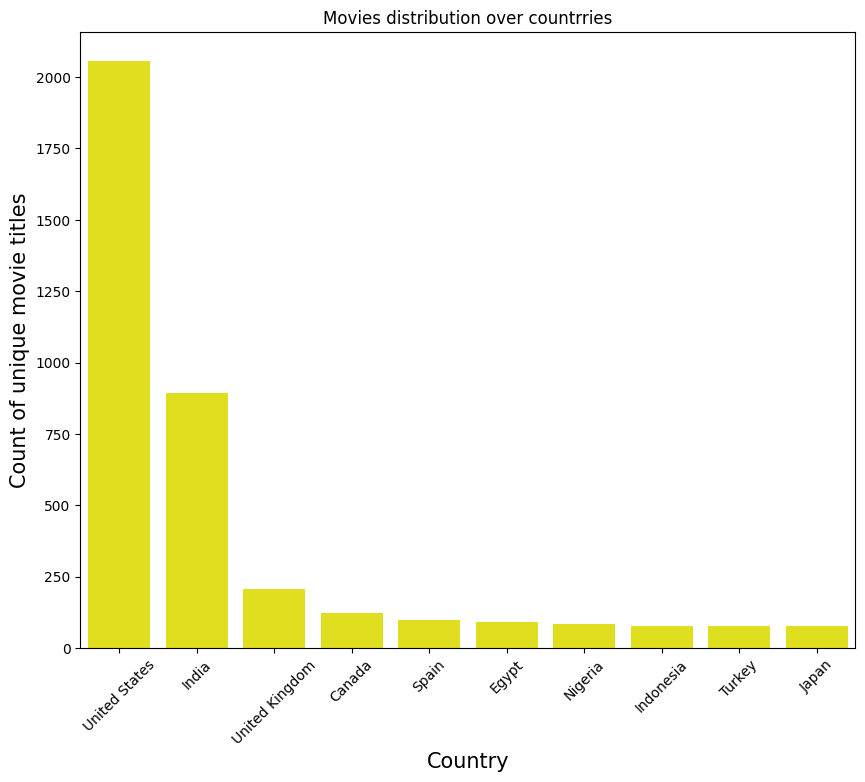

In [89]:
#Graphical Analysis

plt.figure(figsize = (10,8))
sns.barplot(data=top10_movies, x='country', y='title', color='yellow')
plt.xlabel("Country", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Count of unique movie titles",fontsize=15)
plt.title('Movies distribution over countrries')
plt.show()

# sns.countplot(data= recent_data, x='release_year',hue='type' )

<font color='purple'>5. Find the number of TV Show produced in each country and pick the top 10
countries. </font>


In [52]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
5,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0


In [53]:
top10_show = tv_show.groupby('country')['title'].nunique().reset_index().sort_values(by='title', ascending=False)[:11]
top10_show



,country,title
161,United States,760
107,Not Available,391
141,United Kingdom,213
83,Japan,169
121,South Korea,158
66,India,79
133,Taiwan,68
17,Canada,59
47,France,49
4,Australia,48


In [54]:
top10_show = top10_show[top10_show['country'] != 'Not Available']
top10_show

,country,title
161,United States,760
141,United Kingdom,213
83,Japan,169
121,South Korea,158
66,India,79
133,Taiwan,68
17,Canada,59
47,France,49
4,Australia,48
126,Spain,48


Infrences: US produced large number of Tv shows, 4 in position is South Korea and India is at 5th postion

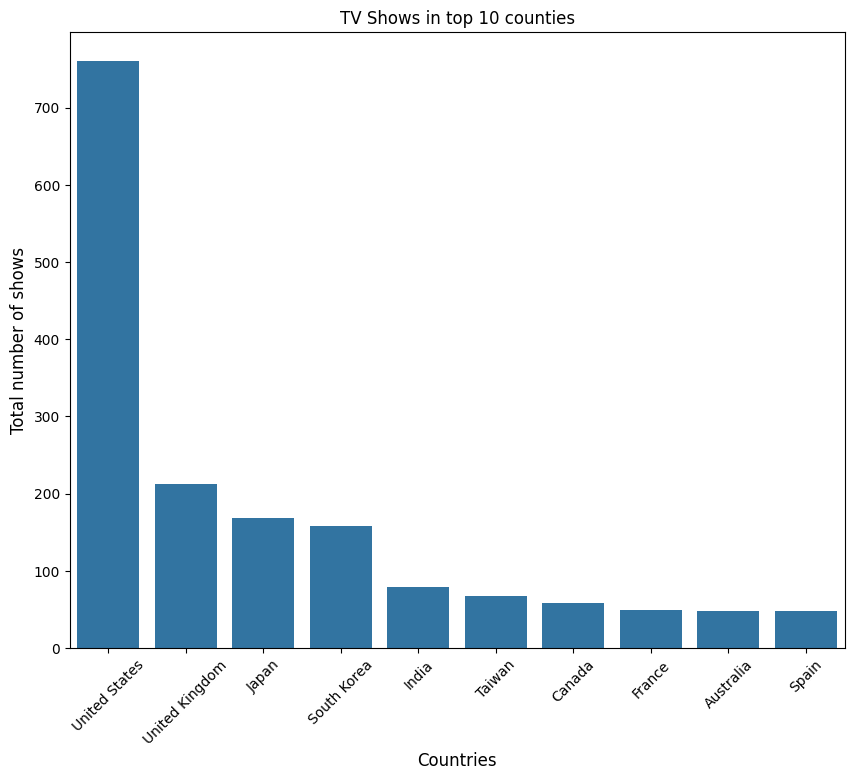

In [55]:
#Graphical Analysis

plt.figure(figsize = (10,8))
plt.title('TV Shows in top 10 counties')
sns.barplot(data=top10_show, x='country', y='title')
plt.xticks(rotation=45)
plt.ylabel('Total number of shows', fontsize='12')
plt.xlabel('Countries', fontsize='12')
plt.show()


- US produced around 760 uniques tv shows.
Infrences: US produced large number of Tv shows, 4 in position is South Korea and India is at 5th postion.
Recommendations: Netflix should focus more on adding Japan and South Korea content to streghten its position in Asia Pacific market.

<font color='purple'> 6. Distribution of ratings and content types</font>

In [56]:
data['rating'].unique()

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'NC-17', 'NR', NaN, 'TV-Y7-FV', 'UR']
Length: 15
Categories (14, object): ['G', 'NC-17', 'NR', 'PG', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [57]:
movies_rating =movies['rating'].value_counts().reset_index()
tvshow_rating= tv_show['rating'].value_counts().reset_index()

In [58]:
print(movies_rating[:5])
print(tvshow_rating[:5])

  rating   count
0  TV-MA  136863
1      R  101377
2  TV-14   89003
3  PG-13   57099
4     PG   38867
  rating   count
0  TV-MA  139158
1  TV-14   61680
2  TV-PG   19164
3  TV-Y7   18031
4   TV-Y    6650


Infrences: Infrences: TV-MA (Mature Audience) is most popular in both types(Tv show & movies) in Netflix

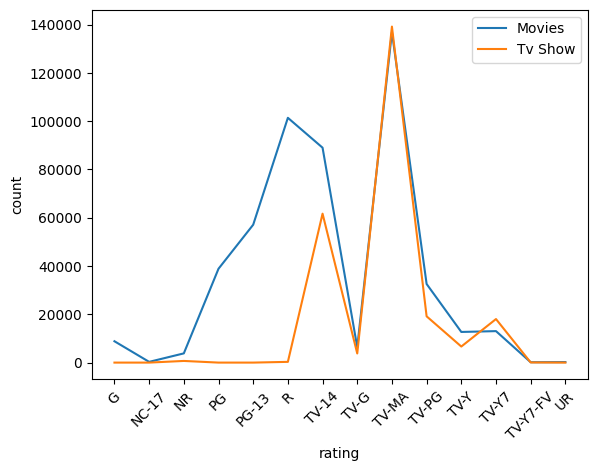

In [59]:
sns.lineplot(data=movies_rating, x='rating', y='count', label='Movies')
sns.lineplot(data=tvshow_rating, x='rating', y='count', label='Tv Show')
plt.xticks(rotation=45)
plt.show()

Infrences:
- TV-MA (Mature Audience) is most popular in both types(Tv show & movies) in Netflix.
- R (Restricted) is much higher in Movies and almost none in TV Shows




<font color='purple'>7. Analysis of actors/directors of different types of shows/movies. </font>



In [60]:
movies['cast'].value_counts()

,count
cast,
Kristen Bell,732
Liev Schreiber,641
Terrence Howard,634
Dennis Quaid,605
Patrick Warburton,599
...,...
Robert Lazar,1
Hedy Lamarr,1
Natalie Palamides,1


In [61]:
top10_actor = movies.groupby('cast')['title'].nunique().sort_values(ascending=False)[1:11].reset_index()
top10_actor



,cast,title
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Akshay Kumar,30
4,Om Puri,30
5,Paresh Rawal,28
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Rupa Bhimani,27
9,Boman Irani,27


Infrences: Actor Anupam Kher appeared in most number of movies

In [62]:
top10_dir = movies.groupby('director')['title'].nunique().sort_values(ascending=False)[1:11].reset_index()
top10_dir

,director,title
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,15
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


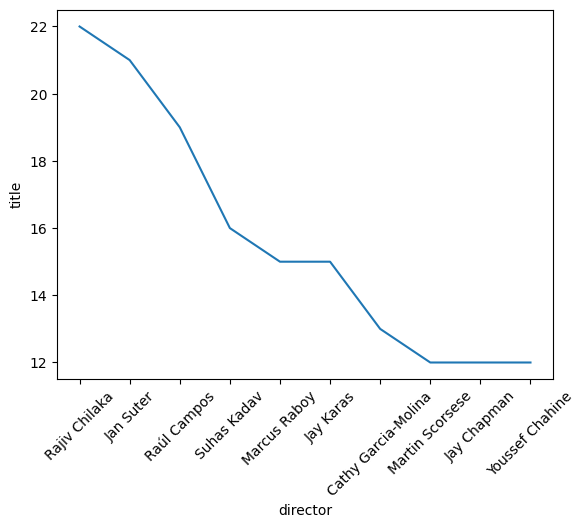

In [63]:
sns.lineplot(data=top10_dir, x='director', y='title')
plt.xticks(rotation=45)
plt.show()

Infrences: Rajiv Chilaka director most number of movies


Top 10 director who directed TV shows

In [64]:
tvtop10_dir = tv_show.groupby('director')['title'].nunique().sort_values(ascending=False)[1:11].reset_index()
tvtop10_dir

,director,title
0,Ken Burns,3
1,Alastair Fothergill,3
2,Stan Lathan,2
3,Hsu Fu-chun,2
4,Gautham Vasudev Menon,2
5,Shin Won-ho,2
6,Lynn Novick,2
7,Joe Berlinger,2
8,Jung-ah Im,2
9,Rob Seidenglanz,2


Infrecnces: Ken Burns and Alastair Fothergill directed most number of TV show.


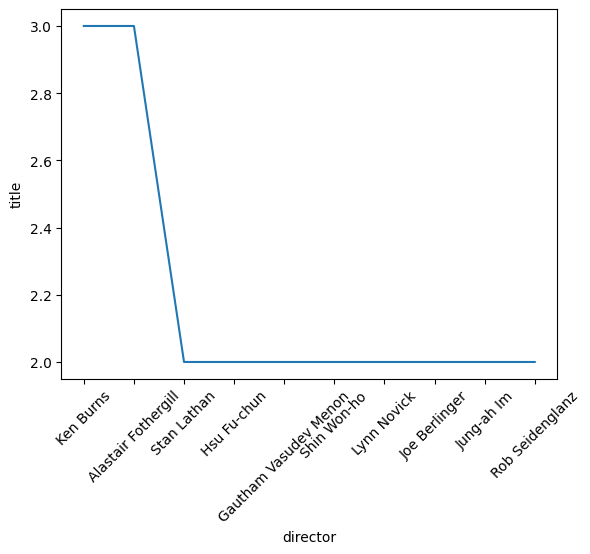

In [65]:
sns.lineplot(data=tvtop10_dir, x='director', y='title')
plt.xticks(rotation=45)
plt.show()

Infrecnces: Ken Burns directed most number of TV show

In [66]:
tvtop10_actor = tv_show.groupby('cast')['title'].nunique().sort_values(ascending=False)[1:11].reset_index()
tvtop10_actor

,cast,title
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,David Attenborough,14
9,Mamoru Miyano,13


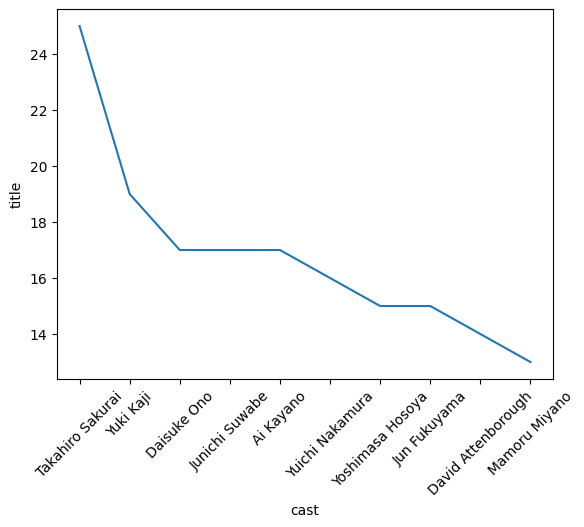

In [67]:
sns.lineplot(data=tvtop10_actor, x='cast', y='title')
plt.xticks(rotation=45)
plt.show()

**Infrences**: Takahiro Sakurai	apperared in most number of TV Shows

  <font color='purple'>8. Which genre movies are more popular or produced more.
</font>



In [68]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
2,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
4,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN


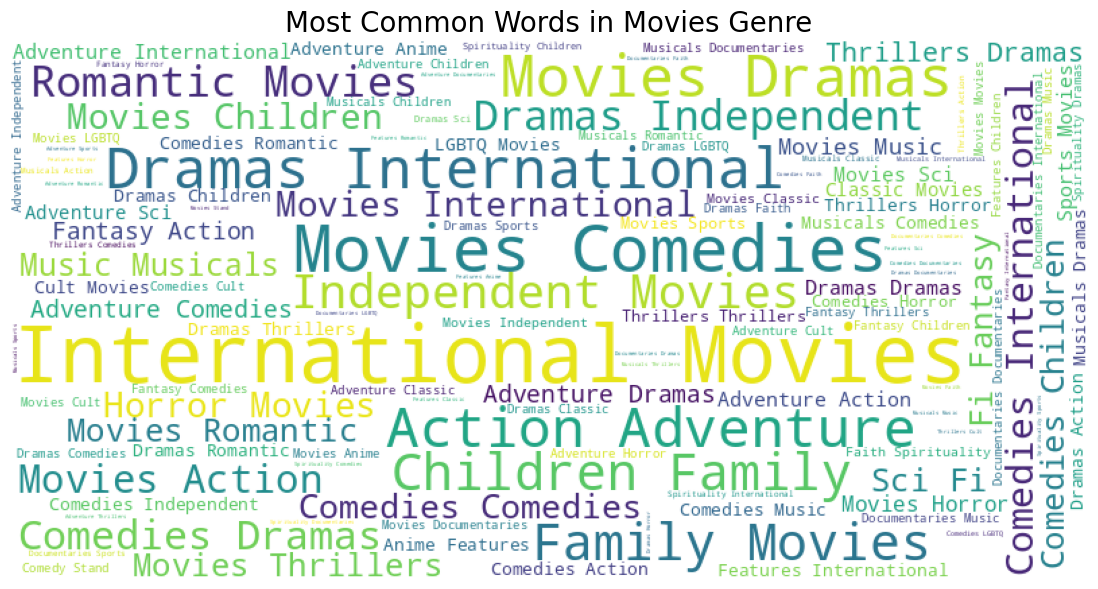

In [69]:
from wordcloud import WordCloud
text = ' '.join(movies['listed_in'].dropna().astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Common Words in Movies Genre", fontsize=20)
plt.show()


**Infrences**: Most common word in movie genre are "International Movies" and 'Dramas"

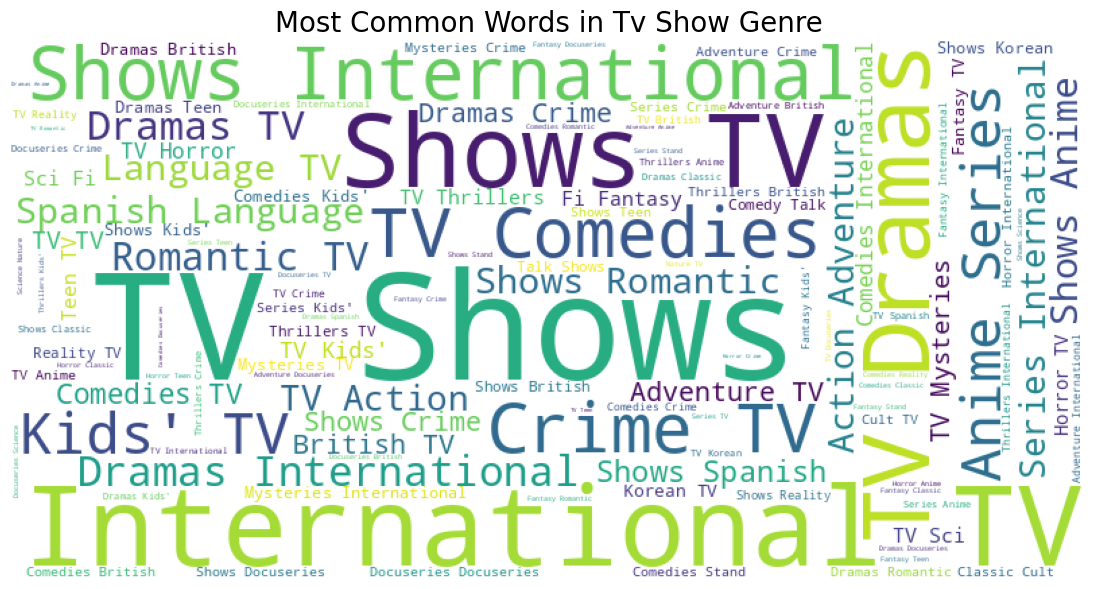

In [70]:
text = ' '.join(tv_show['listed_in'].dropna().astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Common Words in Tv Show Genre", fontsize=20)
plt.show()


**Infrences**: Most common word in Tv Show genre are "International TV Shows", 'Comedies' and 'Dramas"

In [71]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,TV_Show_mints
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
2,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
4,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Not Available,"September 24, 2021",2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN


In [72]:
#Renaming col name in tv show df
tv_show.rename(columns={'TV_Show_mints': 'Show_season'}, inplace=True)
#changing season values to integer type
tv_show['Show_season']=tv_show['Show_season'].astype('int')


<ipython-input-72-63b03ca65f1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show.rename(columns={'TV_Show_mints': 'Show_season'}, inplace=True)
<ipython-input-72-63b03ca65f1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['Show_season']=tv_show['Show_season'].astype('int')


Data Cleaing in TV Show dataframe


In [73]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,Show_season
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
4,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
5,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2


In [74]:
tv_show.drop_duplicates(inplace=True)

<ipython-input-74-864e3f33a3d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show.drop_duplicates(inplace=True)


In [75]:
tv_show.head().reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,movie_mints,Show_season
0,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
2,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
3,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2
4,s2,TV Show,Blood & Water,Unknown Director,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2


In [76]:
tv_show.shape

(20714, 13)

Relation between movies duration and number of movies

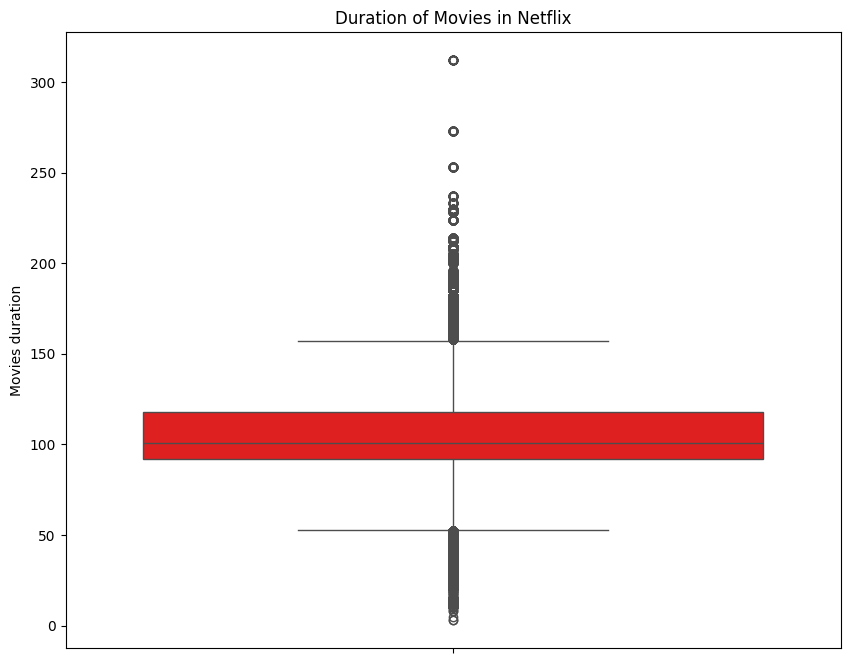

In [77]:
plt.figure(figsize=(10,8))

# plt.showplot(2,2,1)
sns.boxplot(data=movies, y='movie_mints', color='red')
plt.ylabel("Movies duration")

plt.title('Duration of Movies in Netflix')


plt.show()

Around 50% of the movies are about 100 minutes long.

Half of the movies fall in the range of 90 to 120 minutes.

The median is 100 minutes, which means half the movies are shorter than 100 minutes and half are longer.

The outliers show that a few movies are longer than 300 minutes and some are shorter than 50 minutes. (To find the exact number of these, more analysis is needed.)

Number of season vs Tv shows

In [78]:
tv_show['Show_season'].value_counts()


,count
Show_season,
1,12943
2,3586
3,1706
4,791
5,646
7,305
6,278
8,147
9,102


Max tv show is of season 1

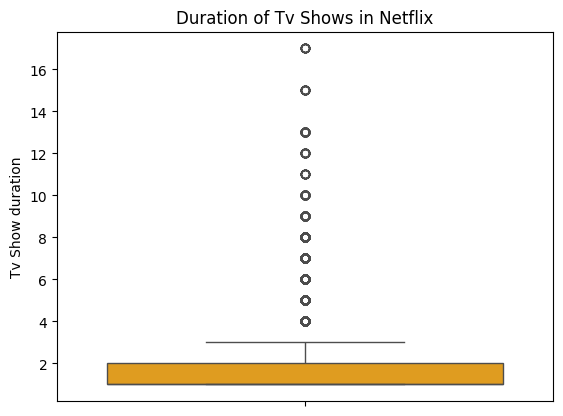

In [79]:
# Graphical analysis
sns.boxplot(data=tv_show, y='Show_season', color='orange')
plt.ylabel("Tv Show duration")

plt.title('Duration of Tv Shows in Netflix')
plt.show()

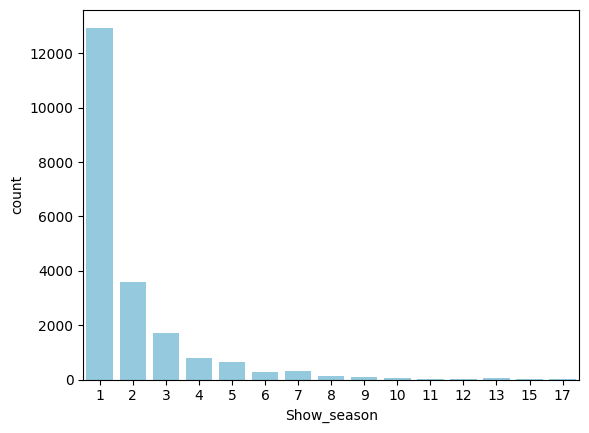

In [80]:

sns.countplot(data=tv_show, x='Show_season', color='skyblue')
plt.show()

- Max TV shows(approx 13k+) in Netflix have season 1.
- Very few shows go beyong 3-4 seasons.
